In [5]:
# !pip install missingno

In [8]:
# !pip install country_converter

# Suicidal Behaviors Among Adolescents
# Data Analysis

In [1]:
# Import Packages
import numpy as np
import pandas as pd

import missingno

import matplotlib.pyplot as plt
import plotly.express as plx

import country_converter

# Eploratory Data Analysis

In [2]:
df = pd.read_csv('GHSH_Pooled_Data1.csv')
df.head()

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9


In [3]:
print("Shape: ", df.shape)

Shape:  (106, 17)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           106 non-null    object 
 1   Year                              106 non-null    int64  
 2   Age Group                         106 non-null    object 
 3   Sex                               106 non-null    object 
 4   Currently_Drink_Alcohol           106 non-null    float64
 5   Really_Get_Drunk                  106 non-null    float64
 6   Overwieght                        106 non-null    float64
 7   Use_Marijuana                     106 non-null    float64
 8   Have_Understanding_Parents        106 non-null    float64
 9   Missed_classes_without_permssion  106 non-null    float64
 10  Had_sexual_relation               106 non-null    float64
 11  Smoke_cig_currently               104 non-null    float64
 12  Had_figh

## Check unique values

In [5]:
def unique_val(columns):
    for col in columns:
        print(f'{"="*50}\nUnique values for {col}')
        val = sorted(df[col].unique())
        print(val)
        print(f'\nTotal Unique: {len(val)}')
        

In [6]:
unique_val(['Country', 'Year', 'Age Group', 'Sex'])

Unique values for Country
['Argentina', 'Barabados', 'Benin', 'Bhutan', 'Brunei Darussalam ', 'Dominican Republic ', 'Fiji Islands', 'Indonesia', 'Jamaica', 'Kiribati', 'Laos', 'Malaysia', 'Mauritus', 'Mongolia', 'Namibia', 'Nepal', 'Peru', 'Samoa', 'Seychelles', 'Suriname', 'Thailand', 'Timor-Leste ', 'Trinidad and Tobago ', 'Tuvalu ', 'Uruguay ', 'Vanuatu ', 'Wallis and Futuna ']

Total Unique: 27
Unique values for Year
[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

Total Unique: 9
Unique values for Age Group
['13-15', '16-17']

Total Unique: 2
Unique values for Sex
['Female', 'Male']

Total Unique: 2


- 27 Countries
- 8 years from 2010-2018
- Age group: 13-15 | 16-17

## Check missing data

In [7]:
print("Missing data: ",df.isnull().sum().sum())

Missing data:  6


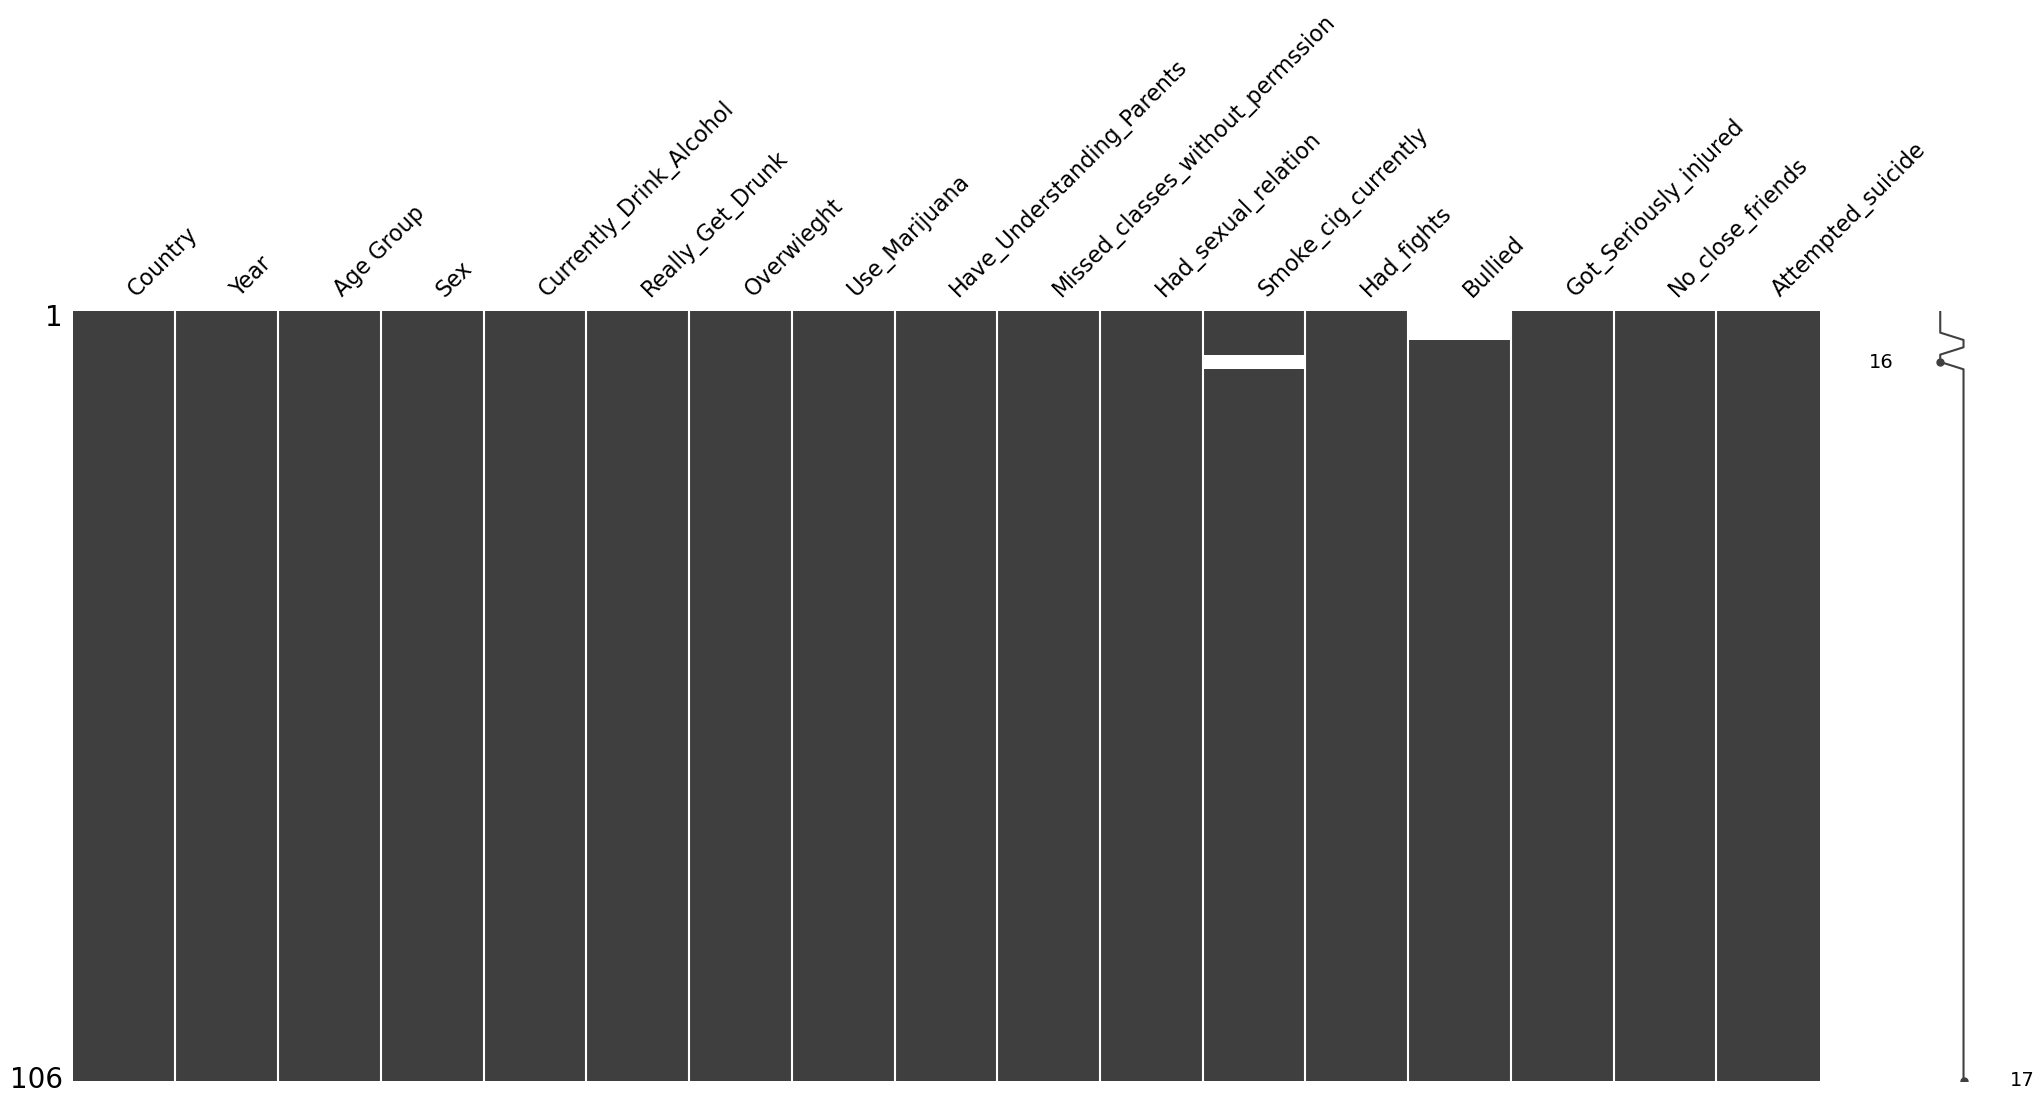

In [8]:
missingno.matrix(df)
plt.show()

### Since there are only few(6) null values, it is okay to drop them in dataset 

In [9]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True)

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
1,Argentina,2012,13-15,Female,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
2,Benin,2016,13-15,Male,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
3,Benin,2016,13-15,Female,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
4,Benin,2016,16-17,Male,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
96,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
97,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
98,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


## Visualize Suicidal Rate By Country

In [12]:
df_mean = df.groupby('Country')[['Attempted_suicide']].mean().sort_values('Attempted_suicide', ascending=False)
fig_bar = plx.bar(x=df_mean.index, y=df_mean['Attempted_suicide'], color=df_mean['Attempted_suicide'], color_continuous_scale='dense')
fig_bar.update_layout(width=850, height=500, title_text='Suicidal Rates by Country')
fig_bar.update_xaxes(title='Country')
fig_bar.update_yaxes(title="Suicidal Rate")
fig_bar.show()